In [23]:
# --- 1: Import Libraries ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [24]:
# --- 2: Load the Dataset ---
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
    'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
df = pd.read_csv(url, header=None, names=column_names)

print("Mushroom Edibility Dataset loaded.")
print("Shape of the dataframe:", df.shape)
print("\nFirst 5 rows of the dataframe:\n", df.head())

Mushroom Edibility Dataset loaded.
Shape of the dataframe: (8124, 23)

First 5 rows of the dataframe:
   class cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0     p         x           s         n        t    p               f   
1     e         x           s         y        t    a               f   
2     e         b           s         w        t    l               f   
3     p         x           y         w        t    p               f   
4     e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   obje

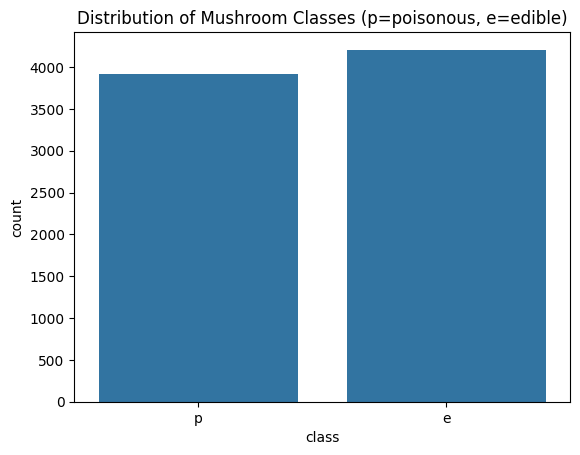


Unique values for some key features:

Unique values in 'cap-shape': ['x' 'b' 's' 'f' 'k' 'c']

Unique values in 'odor': ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Unique values in 'gill-color': ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Unique values in 'stalk-root': ['e' 'c' 'b' 'r' '?']

Unique values in 'habitat': ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [25]:
# --- 3: Explore the Data ---
print("\nInformation about the dataset:")
df.info()

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nClass distribution:")
print(df['class'].value_counts())
sns.countplot(data=df, x='class')
plt.title('Distribution of Mushroom Classes (p=poisonous, e=edible)')
plt.show()

print("\nUnique values for some key features:")
for col in ['cap-shape', 'odor', 'gill-color', 'stalk-root', 'habitat']:
    print(f"\nUnique values in '{col}': {df[col].unique()}")

In [26]:
# --- 4: Preprocess the Data ---

# Encode the target variable ('class': 'p' -> 1, 'e' -> 0)
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# Handle missing values in 'stalk-root' by filling with the mode (most frequent value)
df['stalk-root'] = df['stalk-root'].replace('?', df['stalk-root'].mode()[0])

# Select categorical features (excluding the original 'class' and the encoded one)
categorical_features = df.columns.drop(['class', 'class_encoded'])

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features (X) and the encoded target (y)
X = df_encoded.drop(['class', 'class_encoded'], axis=1)
y = df_encoded['class_encoded']

print("\nData preprocessing completed.")
print("Shape of encoded feature matrix (X):", X.shape)
print("Shape of the encoded target vector (y):", y.shape)
print("\nFirst 5 rows of the encoded dataframe:\n", df_encoded.head())


Data preprocessing completed.
Shape of encoded feature matrix (X): (8124, 94)
Shape of the encoded target vector (y): (8124,)

First 5 rows of the encoded dataframe:
   class  class_encoded  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0     p              1        False        False        False        False   
1     e              0        False        False        False        False   
2     e              0        False        False        False        False   
3     p              1        False        False        False        False   
4     e              0        False        False        False        False   

   cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  ...  \
0         True          False           True          False  ...   
1         True          False           True          False  ...   
2        False          False           True          False  ...   
3         True          False          False           True  ...   
4         True         

In [27]:
# --- 5: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of X_train: (6499, 94)
Shape of X_test: (1625, 94)
Shape of y_train: (6499,)
Shape of y_test: (1625,)


In [28]:
# --- 6: Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# --- 7: Design DNN Model ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: edible (0) or poisonous (1)
])

print("DNN model designed for binary classification.")
model.summary()

DNN model designed for binary classification.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        12,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# --- 8: Compile Model ---
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("DNN model compiled with Adam optimizer and Binary Crossentropy loss.")

DNN model compiled with Adam optimizer and Binary Crossentropy loss.


In [32]:
# --- 9: Train Model ---
epochs = 10
batch_size = 32
history = model.fit(
    X_train_scaled, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

print("DNN model trained.")

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9165 - loss: 0.2018 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9997 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 9.0894e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9999 - loss: 8.9747e-04 - val_accuracy: 1.0000 - val_loss: 5.5046e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.2346e-04 - val_accuracy: 1.0000 - val_loss: 2.9407e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.3644e-04 - val_accuracy: 1.0000 - val_loss: 1.8975e-04
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.1843e-04 - val_accuracy: 1.0000 - val_loss: 1.3565e-04
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 8.7092e-05 - val_accuracy: 1.0000 - val_loss: 9.9492e-05
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accura

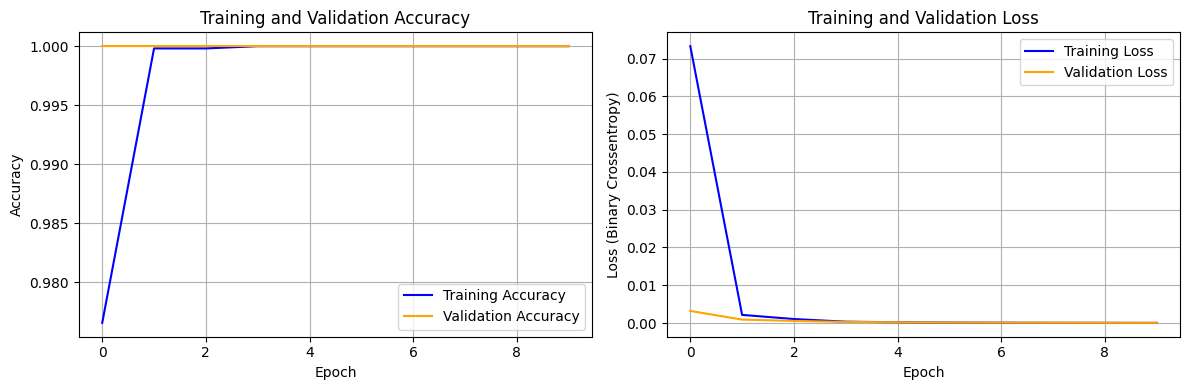

In [33]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()